In [94]:
import requests, bs4
import datetime
from bs4 import BeautifulSoup as bs
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pprint
import re
import csv
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
redfin_df= pd.read_csv("redfin_data_df")
redfin_df.head()

,Unnamed: 0,Price/Sq.Ft.,Lot Size,Year Built,Tax Annual Amount,Tax Year,Tax Exemptions,bedrooms,bathrooms,sq_footage,price,address,City,Zip Code,State,Link,full_link
0,0,262.0,3123 Sq. Ft.,1960.0,5233.99,2019.0,HomeownerSenior,4,3.5,3000.0,785000,"6511 N Oliphant Ave, Chicago, IL 60631",Chicago,60631,IL,/IL/Chicago/6511-N-Oliphant-Ave-60631/home/136...,https://www.redfin.com/IL/Chicago/6511-N-Oliph...
1,1,162.0,0.26 Acres,2004.0,23923.72,2019.0,NaN,5,5.5,7093.0,1149000,"2037 De Cook Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/2037-De-Cook-Ave-60068/home/136...,https://www.redfin.com/IL/Park-Ridge/2037-De-C...
2,2,358.0,10537 Sq. Ft.,1957.0,NaN,NaN,NaN,3,2.0,1116.0,399900,"1541 Lundergan Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/1541-Lundergan-Ave-60068/home/1...,https://www.redfin.com/IL/Park-Ridge/1541-Lund...
3,3,216.0,6599 Sq. Ft.,1953.0,9610.91,2020.0,NaN,3,1.5,1800.0,389000,"609 N Hamlin Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/609-N-Hamlin-Ave-60068/home/136...,https://www.redfin.com/IL/Park-Ridge/609-N-Ham...
4,4,236.0,6651 Sq. Ft.,1940.0,11431.26,2020.0,Homeowner,3,2.5,2456.0,579000,"1820 S Ashland Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/1820-S-Ashland-Ave-60068/home/1...,https://www.redfin.com/IL/Park-Ridge/1820-S-As...


In [10]:
redfin_df.rename(columns= {'Price/Sq.Ft.': "price_per_sqfoot", 'Lot Size': "lot_size", 'Year Built': "year_built",
       'Tax Annual Amount': 'annual_tax_amount', 'Tax Year': "tax_year", 'Tax Exemptions': 'tax_exemptions','City': 'city', 'Zip Code': "zip_code",
       'State': 'state', 'Link': 'link'}, inplace =True)

In [120]:
#redfin_clean= redfin_df.drop(columns= ['Unnamed: 0', 'price_per_sqfoot', 'lot_size',
       #'annual_tax_amount', 'tax_year', 'tax_exemptions',
       #'state', 'link', 'full_link'])

In [11]:
redfin_df= redfin_df[redfin_df["sq_footage"].notna()]

In [12]:
redfin_df= redfin_df[redfin_df["year_built"].notna()]

In [15]:
redfin_df= redfin_df[redfin_df["lot_size"].notna()]

In [17]:
redfin_df= redfin_df[redfin_df["price_per_sqfoot"].notna()]

In [19]:
redfin_df= redfin_df[redfin_df["annual_tax_amount"].notna()]

In [20]:
redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1030
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         744 non-null    int64  
 1   price_per_sqfoot   744 non-null    float64
 2   lot_size           744 non-null    object 
 3   year_built         744 non-null    float64
 4   annual_tax_amount  744 non-null    float64
 5   tax_year           744 non-null    float64
 6   tax_exemptions     498 non-null    object 
 7   bedrooms           744 non-null    object 
 8   bathrooms          744 non-null    float64
 9   sq_footage         744 non-null    float64
 10  price              744 non-null    object 
 11  address            744 non-null    object 
 12  city               744 non-null    object 
 13  zip_code           744 non-null    int64  
 14  state              744 non-null    object 
 15  link               744 non-null    object 
 16  full_link          744 no

In [73]:
redfin_clean= redfin_df.drop(columns= ['Unnamed: 0', 'tax_exemptions', "lot_size", "tax_year", "address", "state", "link", "full_link"])

In [74]:
redfin_clean.dtypes

price_per_sqfoot     float64
year_built           float64
annual_tax_amount    float64
bedrooms              object
bathrooms            float64
sq_footage           float64
price                 object
city                  object
zip_code               int64
dtype: object

In [75]:
redfin_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_per_sqfoot   744 non-null    float64
 1   year_built         744 non-null    float64
 2   annual_tax_amount  744 non-null    float64
 3   bedrooms           744 non-null    object 
 4   bathrooms          744 non-null    float64
 5   sq_footage         744 non-null    float64
 6   price              744 non-null    object 
 7   city               744 non-null    object 
 8   zip_code           744 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 58.1+ KB


In [76]:
redfin_clean= redfin_clean[(redfin_clean.bedrooms.str.isnumeric())]

In [77]:
redfin_clean['price']= redfin_clean['price'].astype(int)

In [78]:
redfin_clean['bedrooms']= redfin_clean['bedrooms'].astype(int)

In [79]:
redfin_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_per_sqfoot   740 non-null    float64
 1   year_built         740 non-null    float64
 2   annual_tax_amount  740 non-null    float64
 3   bedrooms           740 non-null    int64  
 4   bathrooms          740 non-null    float64
 5   sq_footage         740 non-null    float64
 6   price              740 non-null    int64  
 7   city               740 non-null    object 
 8   zip_code           740 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 57.8+ KB


In [80]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
homes = redfin_clean.select_dtypes(include=numerics)
x = homes.drop(columns = ['price','zip_code']).astype(float)
x = sm.add_constant(x)
y = homes['price'].astype(float)

In [81]:
model = sm.OLS(y, x, data = redfin_clean)
model_1 = model.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1270.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:10:39   Log-Likelihood:                -9759.0
No. Observations:                 740   AIC:                         1.953e+04
Df Residuals:                     733   BIC:                         1.956e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.105e+06   3.85e+05     -5.468      0.000   -2.86e+06   -1.35e+06
price_per_sqfoot   2782.3716     74.329     37.433      0.000    2636.449    2928.294
year_built          689.7860    199.547      3.457      0.001     298.034    1081.538
annual_tax_amount     4.7269      1.118      4.226      0.000       2.531       6.923
bedrooms           5076.7985   7238.585      0.701      0.483   -9134.032    1.93e+04
bathrooms          9975.2955   8476.861      1.177      0.240   -6666.526    2.66e+04
sq_footage          228.3322      7.381     30.937      0.000     213.843     242.822
==============================================================================
Omnibus:                      342.529   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12194.802
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                      22.687   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

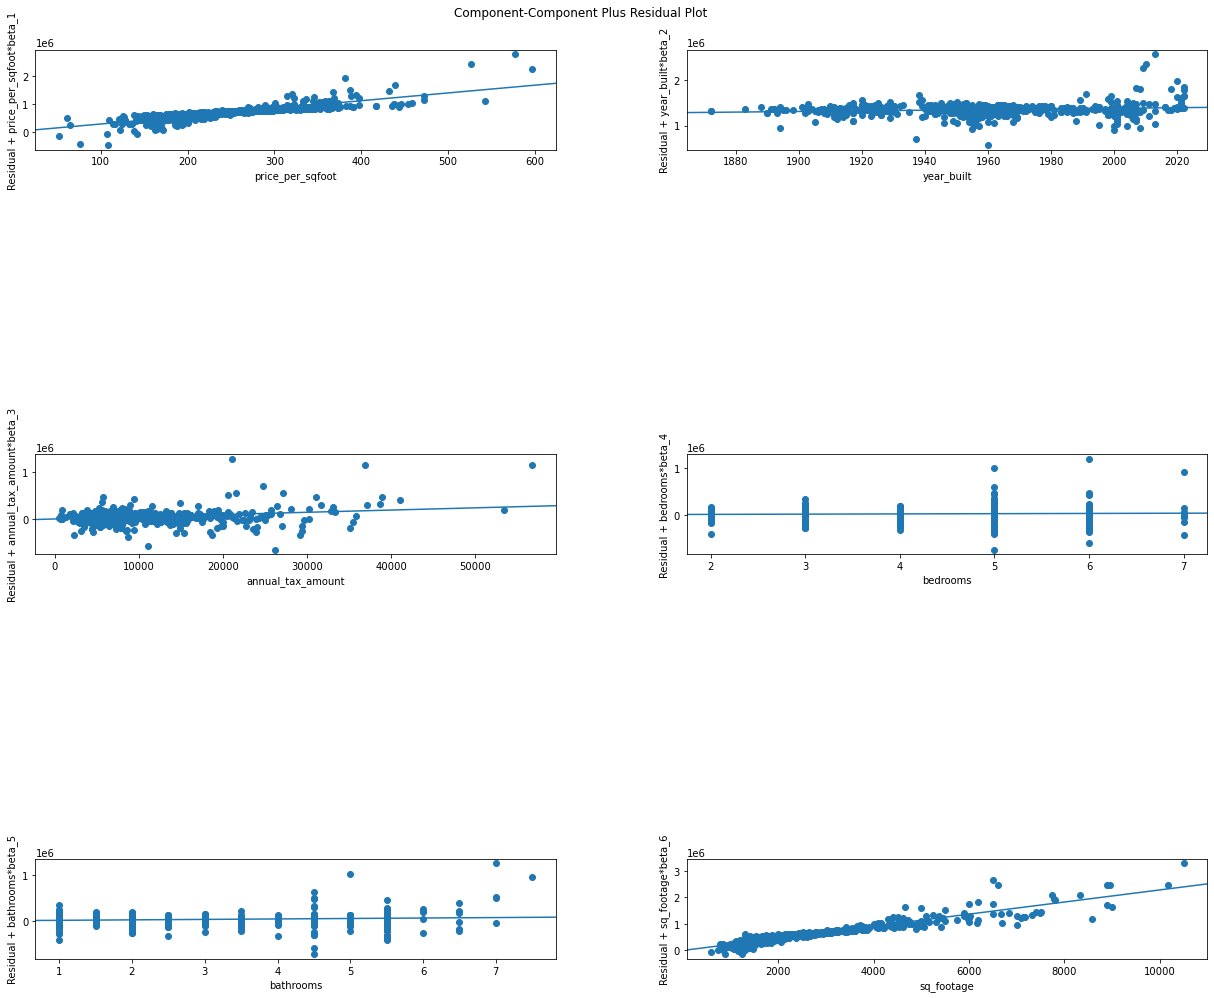

In [82]:
fig = sm.graphics.plot_ccpr_grid(model_1)
fig.set_size_inches(18.5, 20)

In [83]:
redfin_clean

,price_per_sqfoot,year_built,annual_tax_amount,bedrooms,bathrooms,sq_footage,price,city,zip_code
0,262.0,1960.0,5233.99,4,3.5,3000.0,785000,Chicago,60631
1,162.0,2004.0,23923.72,5,5.5,7093.0,1149000,Park Ridge,60068
3,216.0,1953.0,9610.91,3,1.5,1800.0,389000,Park Ridge,60068
4,236.0,1940.0,11431.26,3,2.5,2456.0,579000,Park Ridge,60068
5,169.0,1952.0,9483.00,3,2.0,2187.0,369900,Park Ridge,60068
...,...,...,...,...,...,...,...,...,...
1021,199.0,1966.0,20055.07,6,5.0,6000.0,1195000,Wilmette,60091
1022,297.0,1903.0,18899.72,5,5.0,4040.0,1199000,Wilmette,60091
1026,388.0,2021.0,7976.92,5,5.5,4300.0,1669000,Wilmette,60091
1028,394.0,2020.0,11530.01,5,5.5,4502.0,1775000,Wilmette,60091


In [84]:
df = pd.get_dummies(redfin_clean, columns=['city'], drop_first=True)
df.head()

,price_per_sqfoot,year_built,annual_tax_amount,bedrooms,bathrooms,sq_footage,price,zip_code,city_ Arlington Heights,city_ Bensenville,...,city_ Mount Prospect,city_ Niles,city_ Norridge,city_ Northbrook,city_ Northfield,city_ Oak Park,city_ Park Ridge,city_ Schiller Park,city_ Wilmette,city_ Wood Dale
0,262.0,1960.0,5233.99,4,3.5,3000.0,785000,60631,0,0,...,0,0,0,0,0,0,0,0,0,0
1,162.0,2004.0,23923.72,5,5.5,7093.0,1149000,60068,0,0,...,0,0,0,0,0,0,1,0,0,0
3,216.0,1953.0,9610.91,3,1.5,1800.0,389000,60068,0,0,...,0,0,0,0,0,0,1,0,0,0
4,236.0,1940.0,11431.26,3,2.5,2456.0,579000,60068,0,0,...,0,0,0,0,0,0,1,0,0,0
5,169.0,1952.0,9483.00,3,2.0,2187.0,369900,60068,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#price_sq foot and annual tax - 

In [86]:
X, y = df.drop('price',axis=1), df['price']


In [87]:
#split data into train, test and validation 
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=1)


In [88]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=2)


In [89]:
#function to calculate adjusted r2-is the proportion of the variance in the response variable 
#that can be explained by the predictor variables in a linear regression model.
#n = number of observations
#k = the number of predictor variables

def R_adjusted(r2, n, k):
    return 1- ((1-r2)*(n-1))/(n-k-1)

In [90]:
#Mean Absolute Error (MAE)- 
#we’re just looking at the absolute difference between the data and the model’s predictions
#Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model 
#a small MAE suggests the model is great at prediction
#a large MAE suggests that your model may have trouble in certain areas. 
#A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [ ]:
#When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. 
#the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). 
#By default, the score method does not need the actual predictions. So, when you call: clf.score(X_test, y_test)
#it makes predictions using X_test under the hood and uses those predictions to calculate accuracy score. 
#Think of score as a shorthand to calculate accuracy since it is such a common metric. 



In [ ]:
#Scoring is also called prediction

In [99]:
# Logistic Regression fits a line to a dataset and then returns the probability 
#that a new sample belongs to one of the two classes according to its location with respect to the line.
lr = LinearRegression()
lr.fit(X_train, y_train)
#fit best values 

#class prediction
##function to calculate adjusted r2-is the proportion of the variance in the response variable 
val_set_pred = lr.predict(X_val)
r2 = lr.score(X_val, y_val) 
n = len(y_val) #n = number of observations
k = len(X_train.columns)#k = the number of predictor variables



mean_square_error = mae(y_val, val_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train, y_train)
R2_val = lr.score(X_val, y_val)

nl = '\n'

print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')
#model off by 90K

mae:90989.79089840119
r2_train:0.9150977748279479
r2_val0.9146598533405182
r2_adj0.8936864274665778


In [103]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [ ]:
#x, y: string, series, or vector array
#Input variables. If strings, these should correspond with column names in data. 
#When pandas objects are used, axes will be labeled with the series name.

#fit_regbool, optional
#If True, estimate and plot a regression model relating the x and y variables

#x_ci“ci”, “sd”, int in [0, 100] or None, optional
#Size of the confidence interval used when plotting a central tendency for discrete values of x. 
#If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

#axmatplotlib Axes, optional
#Axes object to draw the plot onto, otherwise uses the current Axes.

As price increases the regression model has a more difficult time handling those data points.



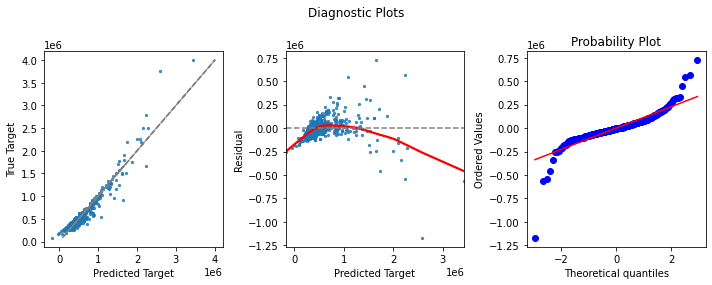

In [104]:
#Plot data and a linear regression model fit.
diagnostic_plots(lr.predict(X_train), y_train)

#1
y- actual value
#better at predicting lower proce houses

#2- y- distance away from prediction- heterskadistity -variance isnt contant 

#3- qq plot- quantiles of 2 distribution - normal distribution (x) , quantilies of obesved data (y)

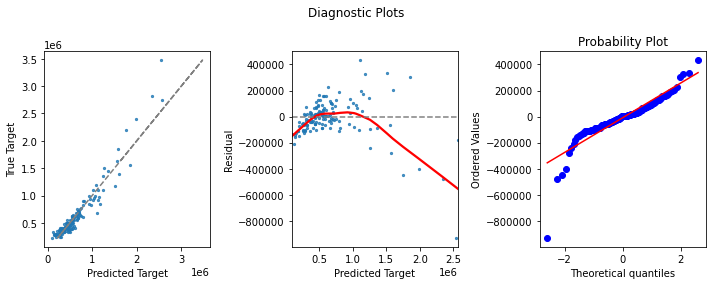

In [96]:
diagnostic_plots(lr.predict(X_val), y_val)


<AxesSubplot:>

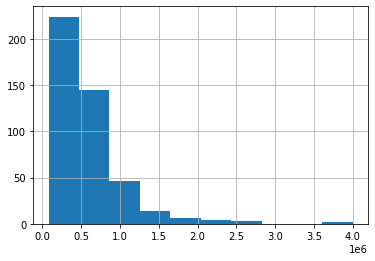

In [97]:
y_train.hist()


In [ ]:
#lasso - method of regulization , keeps most important features and zeros everything else out , stronger lambda the stronger affect 


In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



alphalist_l = 10**(np.linspace(-4,4,400))
err_vec_val = np.zeros(len(alphalist_l))
err_vec_train = np.zeros(len(alphalist_l))

for i,curr_alpha in enumerate(alphalist_l):

    # note the use of a sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600415119854.763, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600414302285.708, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600413446086.652, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/li

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600294259314.705, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600287730939.884, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600280894081.9272, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/l

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599471734968.17, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599426332397.958, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599378783555.1816, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/li

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3593744899634.2197, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3593428403778.3926, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3593096903814.2104, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3557688683566.7876, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3555648147865.8906, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3553509154374.889, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290491009885.3257, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3275034865729.69, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3258765571265.733, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/li

/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1000719366846.0161, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849085970927.8662, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1024095439278.1367, tolerance: 8464187080.780481
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/

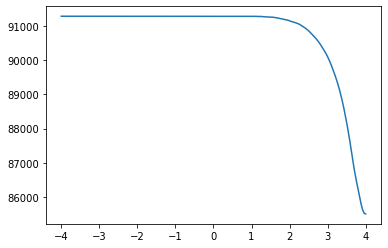

In [106]:
plt.plot(np.log10(alphalist_l), err_vec_val)


In [107]:
np.min(err_vec_val)


85505.28052713546

In [ ]:
#drop features
#variance changes- simple transformation of price, try regression of log price, could make residuals more normal
#dropping outliers- most impactful
#save notebooks to github
#beta coef for variable, do they make sense? fancy neighbors higher beta, how can we use this model? purchase homes?
#random forest regressor - probably more accurate - little harder interperet

